# 0.0 Imports

In [1]:
import pandas as pd
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# 1.0 Loading Dataset

In [2]:
data = pd.read_csv('kc_house_data.csv')

#arredondando as casas da página em 2 casas
pd.set_option('display.float_format', '{:.2f}'.format)

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180.00,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170.00,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770.00,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050.00,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680.00,0,1987,0,98074,47.62,-122.05,1800,7503


# 2.0 Data Types

In [3]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# 2.1 Data transformation

In [4]:
#garantido as datas no formato correto das datas
data['date'] = pd.to_datetime(data['date'], format ='%Y-%m-%d')
data['date']

# Convertendo pés quadrados para metros quadrados (m²)
data['sqft_living']   = data['sqft_living']*0.092903
data['sqft_lot']      = data['sqft_lot']*0.092903
data['sqft_living15'] = data['sqft_living15']*0.092903
data['sqft_lot15']    = data['sqft_lot15']*0.092903

# Modificando feature de Waterfront
data['waterfront'] = data['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')

data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,109.63,524.90,1.00,no,0,...,7,1180.00,0,1955,0,98178,47.51,-122.26,124.49,524.90
1,6414100192,2014-12-09,538000.00,3,2.25,238.76,672.80,2.00,no,0,...,7,2170.00,400,1951,1991,98125,47.72,-122.32,157.01,709.69
2,5631500400,2015-02-25,180000.00,2,1.00,71.54,929.03,1.00,no,0,...,6,770.00,0,1933,0,98028,47.74,-122.23,252.70,748.98
3,2487200875,2014-12-09,604000.00,4,3.00,182.09,464.51,1.00,no,0,...,7,1050.00,910,1965,0,98136,47.52,-122.39,126.35,464.51
4,1954400510,2015-02-18,510000.00,3,2.00,156.08,750.66,1.00,no,0,...,8,1680.00,0,1987,0,98074,47.62,-122.05,167.23,697.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.00,3,2.50,142.14,105.07,3.00,no,0,...,8,1530.00,0,2009,0,98103,47.70,-122.35,142.14,140.19
21609,6600060120,2015-02-23,400000.00,4,2.50,214.61,540.05,2.00,no,0,...,8,2310.00,0,2014,0,98146,47.51,-122.36,170.01,668.90
21610,1523300141,2014-06-23,402101.00,2,0.75,94.76,125.42,2.00,no,0,...,7,1020.00,0,2009,0,98144,47.59,-122.30,94.76,186.46
21611,291310100,2015-01-16,400000.00,3,2.50,148.64,221.85,2.00,no,0,...,8,1600.00,0,2004,0,98027,47.53,-122.07,130.99,119.57


# 2.2 New Features

In [5]:
# Adicionar colunas de dia, semana, mês e ano

data['year'] = 'NA'
data['week_of_year'] = 'NA'
data['month'] = 'NA'
data['day'] = 'NA'

data['year'] = data['date'].dt.year
data['week_of_year'] = data['date'].dt.isocalendar().week
data['month'] = data.date.dt.strftime("%Y-%m")
data['day'] = data['date'].dt.day

# Adicionar coluna com a estação do ano
data['seasons'] = data['date'].apply(lambda x: 'Spring' if (x.day_of_year > 80) & (x.day_of_year <= 173) else
                                               'Summer' if (x.day_of_year > 173) & (x.day_of_year <= 267) else
                                               'Fall'   if (x.day_of_year > 267) & (x.day_of_year <= 356) else
                                               'Winter')
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'week_of_year',
       'month', 'day', 'seasons'],
      dtype='object')

# 2.3 Verificando NA's

In [6]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
week_of_year     0
month            0
day              0
seasons          0
dtype: int64

# 2.3 Limpeza dos Dados

In [7]:
data[data['id'].duplicated(keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,week_of_year,month,day,seasons
93,6021501535,2014-07-25,430000.00,3,1.50,146.79,464.51,1.00,no,0,...,98117,47.69,-122.39,145.86,418.06,2014,30,2014-07,25,Summer
94,6021501535,2014-12-23,700000.00,3,1.50,146.79,464.51,1.00,no,0,...,98117,47.69,-122.39,145.86,418.06,2014,52,2014-12,23,Winter
313,4139480200,2014-06-18,1384000.00,4,3.25,398.55,1124.41,1.00,no,3,...,98006,47.55,-122.10,358.61,1044.60,2014,25,2014-06,18,Spring
314,4139480200,2014-12-09,1400000.00,4,3.25,398.55,1124.41,1.00,no,3,...,98006,47.55,-122.10,358.61,1044.60,2014,50,2014-12,9,Fall
324,7520000520,2014-09-05,232000.00,2,1.00,115.20,1123.38,1.00,no,0,...,98146,47.50,-122.35,169.08,693.06,2014,36,2014-09,5,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,2015-03-30,502000.00,4,2.50,248.98,514.59,2.00,no,0,...,98045,47.48,-121.73,248.98,556.67,2015,14,2015-03,30,Spring
20779,6300000226,2014-06-26,240000.00,4,1.00,111.48,201.69,1.50,no,0,...,98133,47.71,-122.34,104.98,148.46,2014,26,2014-06,26,Summer
20780,6300000226,2015-05-04,380000.00,4,1.00,111.48,201.69,1.50,no,0,...,98133,47.71,-122.34,104.98,148.46,2015,19,2015-05,4,Spring
21580,7853420110,2014-10-03,594866.00,3,3.00,258.27,557.42,2.00,no,0,...,98065,47.52,-121.89,264.77,557.42,2014,40,2014-10,3,Fall


In [8]:
## excluindo duplicadas

data1 = data.drop_duplicates(subset = 'id', keep = 'last')
data1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,week_of_year,month,day,seasons
0,7129300520,2014-10-13,221900.00,3,1.00,109.63,524.90,1.00,no,0,...,98178,47.51,-122.26,124.49,524.90,2014,42,2014-10,13,Fall
1,6414100192,2014-12-09,538000.00,3,2.25,238.76,672.80,2.00,no,0,...,98125,47.72,-122.32,157.01,709.69,2014,50,2014-12,9,Fall
2,5631500400,2015-02-25,180000.00,2,1.00,71.54,929.03,1.00,no,0,...,98028,47.74,-122.23,252.70,748.98,2015,9,2015-02,25,Winter
3,2487200875,2014-12-09,604000.00,4,3.00,182.09,464.51,1.00,no,0,...,98136,47.52,-122.39,126.35,464.51,2014,50,2014-12,9,Fall
4,1954400510,2015-02-18,510000.00,3,2.00,156.08,750.66,1.00,no,0,...,98074,47.62,-122.05,167.23,697.05,2015,8,2015-02,18,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.00,3,2.50,142.14,105.07,3.00,no,0,...,98103,47.70,-122.35,142.14,140.19,2014,21,2014-05,21,Spring
21609,6600060120,2015-02-23,400000.00,4,2.50,214.61,540.05,2.00,no,0,...,98146,47.51,-122.36,170.01,668.90,2015,9,2015-02,23,Winter
21610,1523300141,2014-06-23,402101.00,2,0.75,94.76,125.42,2.00,no,0,...,98144,47.59,-122.30,94.76,186.46,2014,26,2014-06,23,Summer
21611,291310100,2015-01-16,400000.00,3,2.50,148.64,221.85,2.00,no,0,...,98027,47.53,-122.07,130.99,119.57,2015,3,2015-01,16,Winter


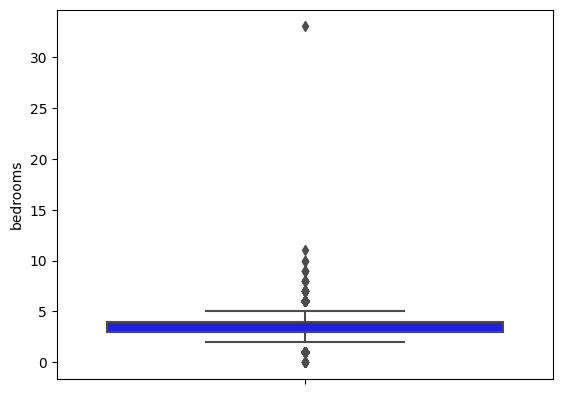

In [9]:
# Verificando os outliers
# Gráfico box-plot para observar o outilier presente em bedrooms
fig, axes = plt.subplots(1)
sns.boxplot( y=data["bedrooms"], color="blue",orient='v');
plt.show()

'''
Observou-se na variável 'bedrooms', que há uma casa com 33 quartos. Porém, ao relizar algumas análises e observar
o gráfico box-plot abaixo, notou-se que tal número pode indicar um erro de digitação. Tal questão, é afirmado
pois o preço e tamanho da casa estão dentro do esperado para imóveis que possuem três quatos. Dessa forma, 
o valor de 33 quartos foi substituído como de três quartos.
'''
# substituindo o número 33 pelo número 3
data['bedrooms'] = data['bedrooms'] .replace(['33'],'3')

# 3.0 Descrição dos Dados

In [10]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21436.00,4580765328.18,2876589633.67,1000102.00,2123700078.75,3904921185.00,7308675062.50,9900000190.00
price,21436.00,541649.96,367314.93,75000.00,324866.00,450000.00,645000.00,7700000.00
bedrooms,21436.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21436.00,2.12,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21436.00,193.49,85.39,26.94,132.85,178.37,236.90,1257.91
sqft_lot,21436.00,1406.15,3859.06,48.31,468.23,707.36,993.71,153416.21
floors,21436.00,1.50,0.54,1.00,1.00,1.50,2.00,3.50
view,21436.00,0.24,0.77,0.00,0.00,0.00,0.00,4.00
condition,21436.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00
grade,21436.00,7.66,1.17,1.00,7.00,7.00,8.00,13.00


# 4.0 Análise Exploratoria de Dados

In [11]:
def compartion_graph(labels,values,title,*kargs):
    
    sns.set_style("darkgrid")

    # criando figure e titulo
    fig = plt.figure(figsize=(10,5))
    plt.title(title,fontdict={'fontsize': 15})
    plt.xticks(fontsize=10)
    
    # plotando grafico
    g = sns.barplot(x=labels,y=values,palette='magma')
    
    # incluindo labels nas barras
    for i in g.containers:
        g.bar_label(i, color='white', label_type= 'center',fontsize='x-small',fmt='%.2f')
        
    plt.show()

#### H1: Imóvel que possuem vista para água são 30% mais caros na média

Diferença percentual de preços: 212.64 %


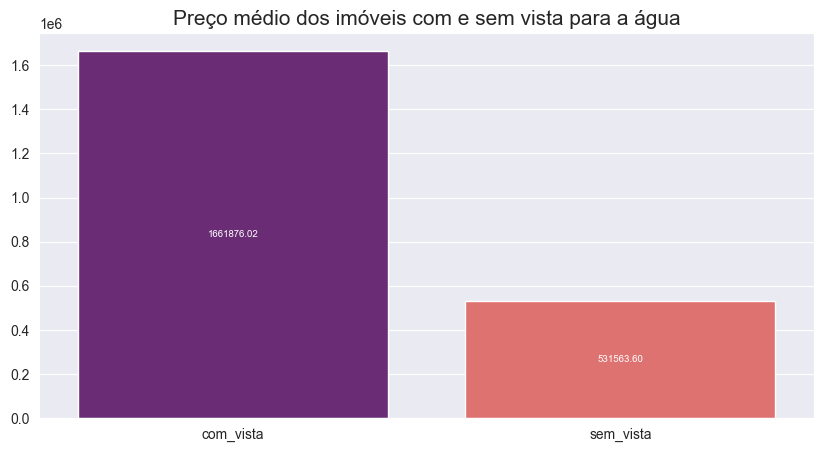

In [12]:
# separando o preço médio dos imóveis
waterfront_price_median = data.loc[data['waterfront'] == 'yes', 'price'].mean()
not_waterfront_price_median = data.loc[data['waterfront'] == 'no', 'price'].mean()

# diferença percentual
diff = round((waterfront_price_median - not_waterfront_price_median)*100/ (not_waterfront_price_median),2)
print('Diferença percentual de preços:',diff,'%')

# plot
compartion_graph(['com_vista','sem_vista'],[waterfront_price_median,not_waterfront_price_median],'Preço médio dos imóveis com e sem vista para a água',diff)

##### Falso, imóveis com vista para a água são em média 212% mais caros

#### H2: Imóveis com data de construção menor que 1955 são 50% mais baratos na média

Diferença percentual de Preços 0.79 %


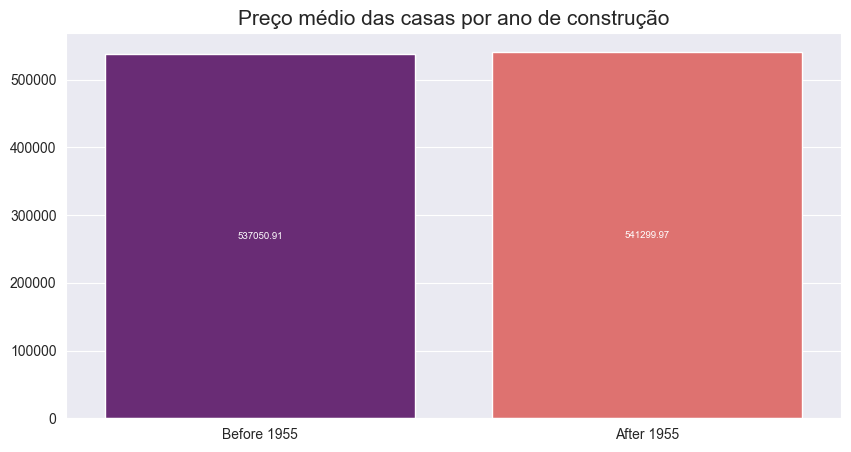

In [13]:
# separando a média entre os imóveis
before1955 = data.loc[data['yr_built'] < 1955,'price'].mean()
after1995 = data.loc[data['yr_built'] >= 1955,'price'].mean()

# diferença percentual
diff = round((after1995 - before1955)*100/before1955,2)
print('Diferença percentual de Preços',diff,'%')

compartion_graph(['Before 1955','After 1955'],[before1955,after1995],'Preço médio das casas por ano de construção',diff)

#### H3: Imóveis sem porão possuem área total (sqrt_lot) são 40% maiores do que os imóveis com porão

Diferença percentual de Area 18.0 %


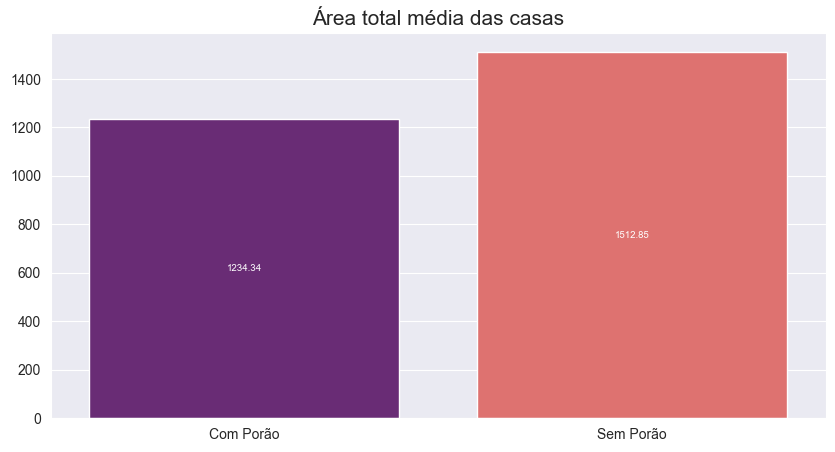

In [14]:
# média do tamanho total de imóveis com e sem porão
basement_sqft_mean = data.loc[ data.sqft_basement != 0, 'sqft_lot'].mean() 
no_basement_sqft_mean = data.loc[ data.sqft_basement == 0, 'sqft_lot'].mean() 

# diferença percentual
diff = round((no_basement_sqft_mean - basement_sqft_mean)/ no_basement_sqft_mean,2)* 100
print('Diferença percentual de Area',diff,'%')

# plotando
compartion_graph(['Com Porão','Sem Porão'],[basement_sqft_mean,no_basement_sqft_mean],'Área total média das casas',diff)

##### Falso, imóveis sem porão possuem área total 18% maior que imóveis com porão

#### H4: O crescimento do preço dos imóveis YoY (Year over Year) é de 10%


Crescimento de Preços YoY:  0.52 %


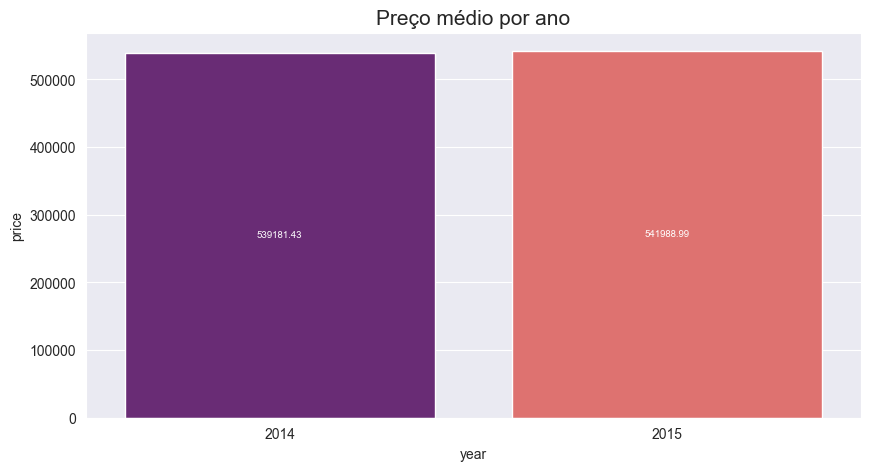

In [15]:
# agrupando os preços por ano
df = data[['year','price']].groupby('year').mean().reset_index()

# calculando a variação entre dois anos consecutivos
df['var'] = df['price'].rolling(window=2).apply( lambda x: round((x.iloc[1] / x.iloc[0] -1) * 100,2) )
print('Crescimento de Preços YoY: ',df['var'][1],'%')

# plot
compartion_graph(df['year'],df['price'],'Preço médio por ano')

##### Falso, o crescimento de preços YoY é de 0,5%

#### H5: Imóveis com 3 banheiros tem um crescimento MoM (Month over Month) de 15%

In [17]:
# calculando variação entre dois meses consecutivos
df2 = data[data['bathrooms'] == 3][['price','month']].groupby('month').mean().reset_index()
df2['var_MoM'] = df2['price'].rolling(window=2).apply( lambda x: (x.iloc[1] / x.iloc[0] -1) * 100 )

# variação média, máxima e mínima
var_MoM_mean = round(df2['var_MoM'].mean(),2)
max_ = round(df2['var_MoM'].max(),2)
min_ = round(df2['var_MoM'].min(),2)
print('A variação média dos preços YoY é de: ',var_MoM_mean,'%')

A variação média dos preços YoY é de:  0.23 %


Text(6, 12, 'Max variation = 12.31%')

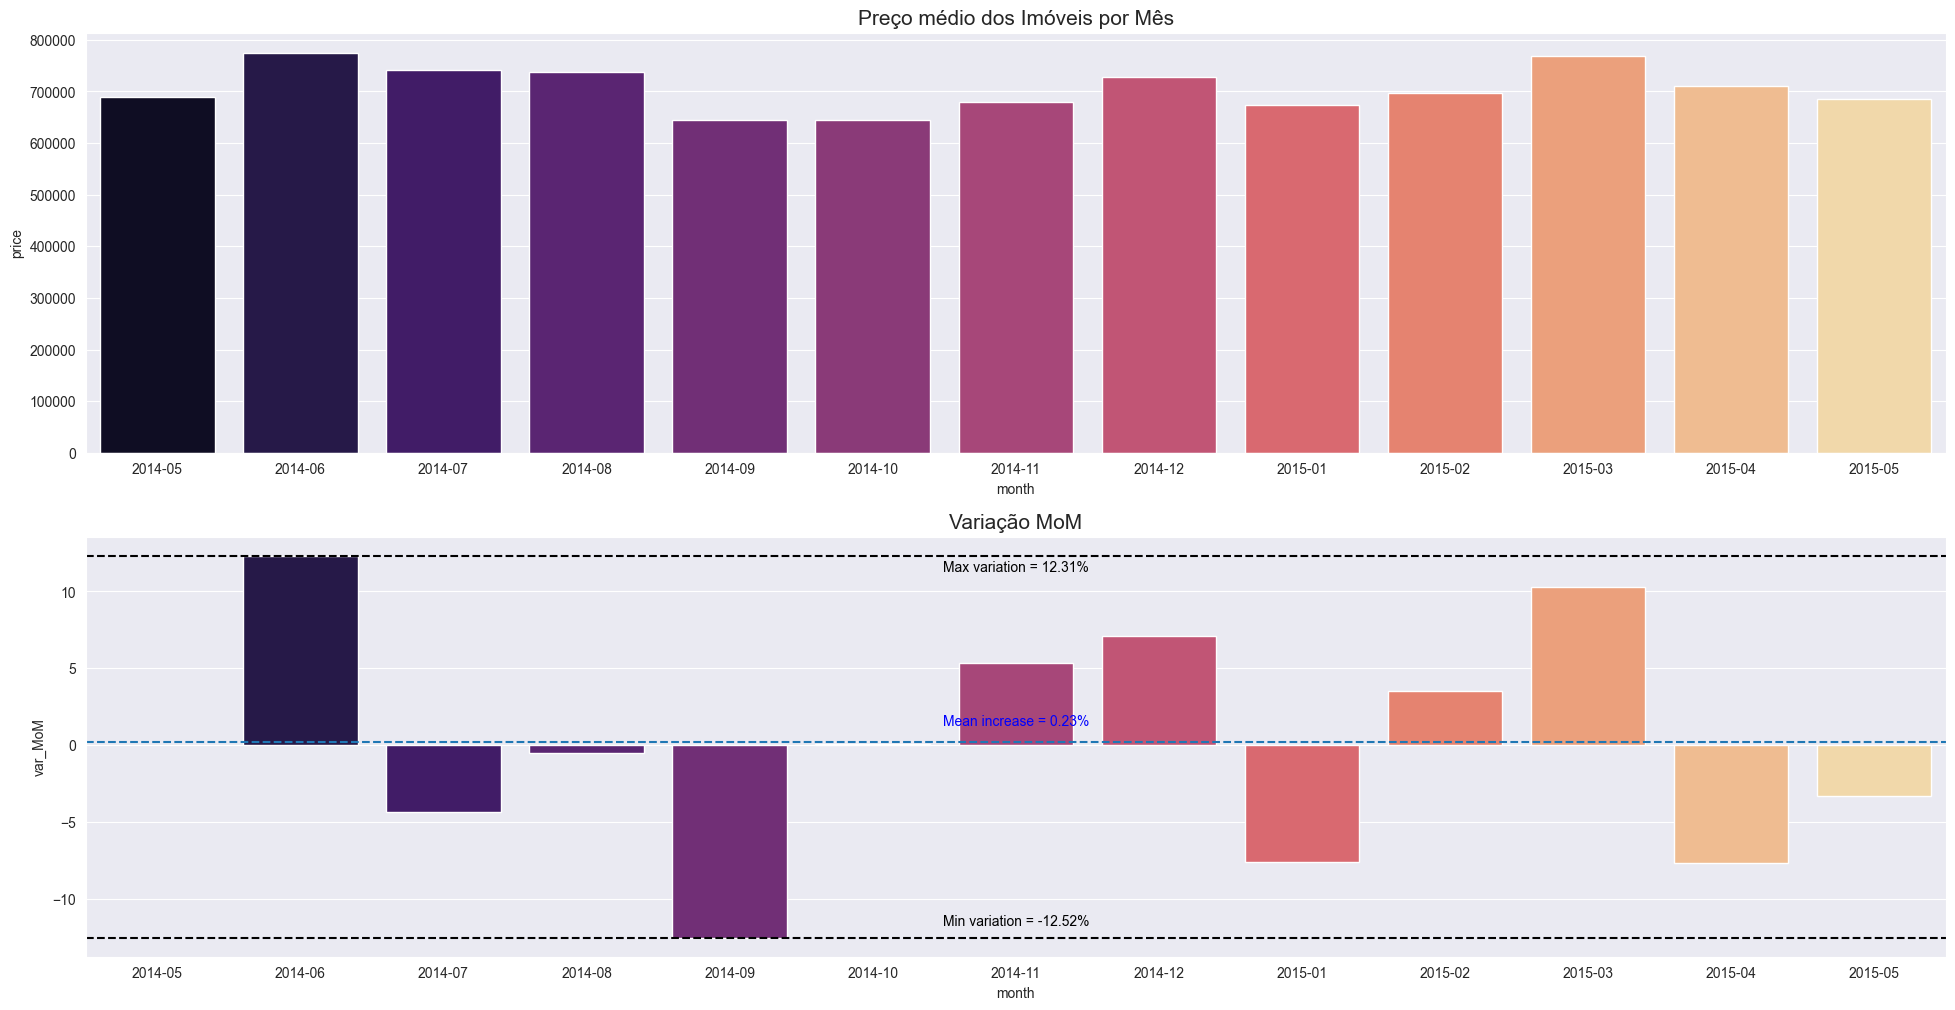

In [18]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(24, 12))

##### Plot do prço médio por mês

# criando figure e titulo
axes[0].set_title('Preço médio dos Imóveis por Mês',fontdict={'fontsize': 15})

# plotando grafico
sns.barplot(x=df2['month'],y=df2['price'],palette='magma',ax=axes[0])

#### Plot da variação do preço médio por mês

# definidno titulo
axes[1].set_title('Variação MoM',fontdict={'fontsize':15})

# plotando gráfico
sns.barplot(x='month',y='var_MoM',data=df2,palette='magma',ax=axes[1])

# defindo configurações de linha
axes[1].axhline(var_MoM_mean, ls='--')
axes[1].text(6, 2.0, f'Mean increase = {var_MoM_mean}%',
         rotation=0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
         color='blue',
        fontsize=10)
axes[1].axhline(df2['var_MoM'].min(), ls='--',color='black')
axes[1].text(6, -11, f'Min variation = {min_}%',
         rotation=0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
         color='black',
         fontsize=10)
axes[1].axhline(max_, ls='--',color='black',label='Max variation')
axes[1].text(6, 12, f'Max variation = {max_}%',
         rotation=0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
         color='black',
         fontsize=10)

##### Falso, o crescimento médio MoM dos imóveis com 3 banheiros no período analisado é de 12%

#### H6: No inverno as casas são em média 30% mais baratas que nas outras estações

Diferença percentual de Preços 4 %


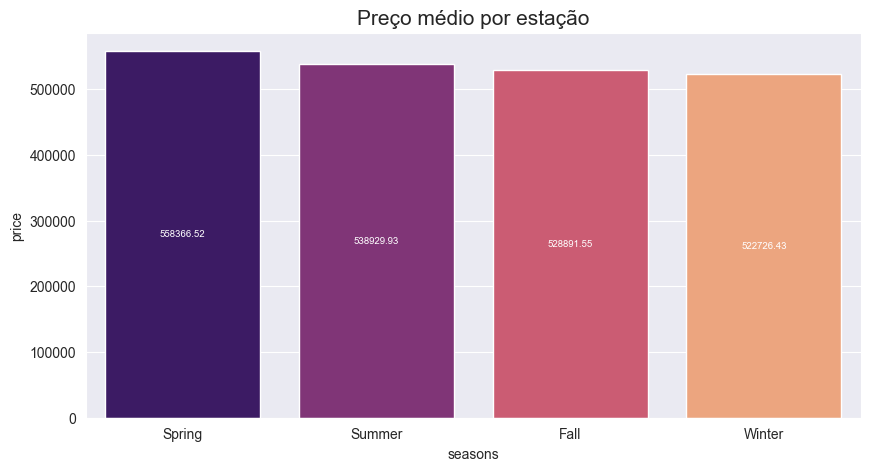

In [19]:
# média do tamanho total de imóveis com e sem porão
winter = data.loc[ data.seasons == 'Winter', 'price'].mean() 
not_winter = data.loc[ data.seasons != 'Winter', 'price'].mean() 

# diferença percentual
diff = round((not_winter - winter)/ winter * 100)
print('Diferença percentual de Preços',diff,'%')

df = data[['seasons','price']].groupby('seasons').mean().sort_values(by='price',ascending=False).reset_index()
compartion_graph(df['seasons'],df['price'],'Preço médio por estação',diff)

##### Falso, a diferença percentual de preços é de 4%

#### H7: Casas com um alto grau de qualidade e design são até 50% mais caras

Diferença percentual de Preços 227.21 %


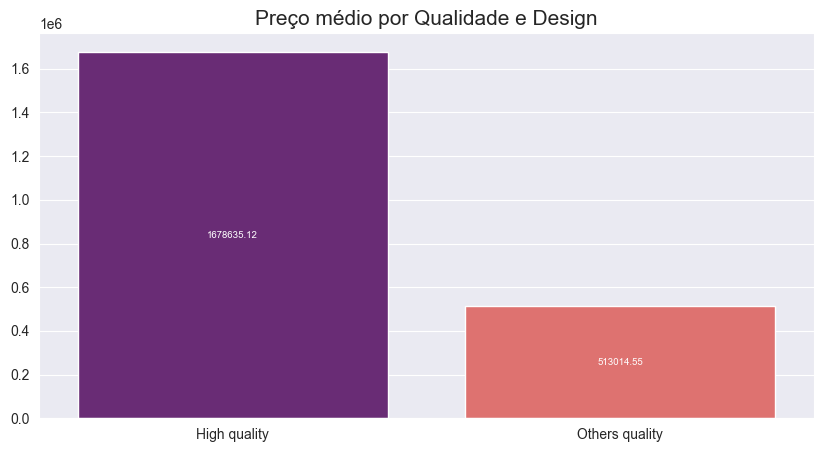

In [20]:
high_quality = round(data.loc[data['grade'] >=11, 'price'].mean(),2)
others_quality = round(data.loc[data['grade'] < 11, 'price'].mean(),2)

diff = round(100*(high_quality - others_quality)/others_quality,2)
print('Diferença percentual de Preços',diff,'%')

compartion_graph(['High quality','Others quality'],[high_quality,others_quality],'Preço médio por Qualidade e Design')

##### False, casas com um alto grau de qualidade e design são em média 227% mais caras

#### H8: Imóveis não reformados são 10% mais baratos do que a média dos imóveis reformados por região.


Diferença percentual de Preços 43.37 %


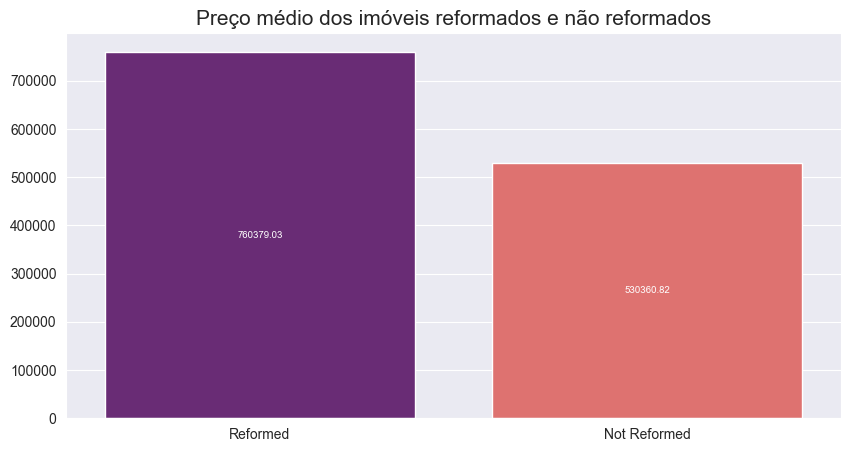

In [21]:
# média do tamanho total de imóveis com e sem porão
reformed = round(data.loc[data['yr_renovated'] > 0, 'price'].mean(),2)
not_reformed = round(data.loc[data['yr_renovated'] == 0, 'price'].mean(),2)

# diferença percentual
diff = round(100*(reformed - not_reformed)/not_reformed,2)
print('Diferença percentual de Preços',diff,'%')

compartion_graph(['Reformed','Not Reformed'],[reformed,not_reformed],'Preço médio dos imóveis reformados e não reformados', diff)

##### False, os preços medios dos imoveis reformados variam em media 43%

# 5.0 Solução das questões de negócio

#### 1 - Quais são os negócios que a House Rocket deveria comprar e por qual preço?



In [22]:
df1 = data.copy()

median_price = df1[['zipcode', 'price']].groupby('zipcode').median().reset_index()
date2 = pd.merge(median_price, df1, on='zipcode', how = 'inner')

date2 = date2.rename(columns = {'price_y' : 'price', 'price_x' : 'median_price'} ) 


for i in range(len(date2)):
    if ((date2.loc[i, 'price'] < date2.loc[i, 'median_price']) 
        & (date2.loc[i, 'condition'] >= 3)):
         date2.loc[i,'buy'] =  'Recomendado'
    else:
        date2.loc[i, 'buy'] = 'Não'

#Casas para comprar
comprar = date2[date2['buy'] == 'Recomendado']

comprar['buy'].shape[0]
comprar[['id', 'price', 'buy']]

,id,price,buy
5,3353400435,230000.00,Recomendado
6,9262800171,252000.00,Recomendado
7,3353401710,227950.00,Recomendado
8,8159610030,196000.00,Recomendado
10,7967200060,243000.00,Recomendado
...,...,...,...
21606,2771604196,465000.00,Recomendado
21607,2770601457,542300.00,Recomendado
21608,2770601912,570000.00,Recomendado
21611,2770601782,453000.00,Recomendado


In [39]:
# salvando tabela de sugestao de compras

sugestion_buy = comprar[['id','price','buy']].copy()

sugestion_buy.to_csv('sugestion_buy.csv')

#### 2- Uma vez comprado, qual é o melhor momento para vendê-lo e por qual preço?



In [31]:
date3 = date2.copy()

date3 = date2[date2['buy'] == 'Recomendado']

date4 = date3[['seasons', 'zipcode', 'price']].groupby(['zipcode', 'seasons']).median().reset_index()

date5 = date4.rename(columns = {'price' : 'price_medi_seasons', 'season': 'seasons_median'} ) 

date6 = pd.merge(date4, date5, on='zipcode', how = 'inner')

for i, row in date6.iterrows():
    if (row['price_medi_seasons'] > row['price']):
        date6.loc[i, 'sale'] =  row['price'] * 1.1
    else:
        date6.loc[i, 'sale'] = row['price'] * 1.3

        
date6

,zipcode,seasons_x,price,seasons_y,price_medi_seasons,sale
0,98001,Fall,215000.00,Fall,215000.00,279500.00
1,98001,Fall,215000.00,Spring,214100.00,279500.00
2,98001,Fall,215000.00,Summer,215000.00,279500.00
3,98001,Fall,215000.00,Winter,221000.00,236500.00
4,98001,Spring,214100.00,Fall,215000.00,235510.00
...,...,...,...,...,...,...
1115,98199,Summer,514000.00,Winter,551250.00,565400.00
1116,98199,Winter,551250.00,Fall,521250.00,716625.00
1117,98199,Winter,551250.00,Spring,542500.00,716625.00
1118,98199,Winter,551250.00,Summer,514000.00,716625.00


In [41]:
# salvando tabela de sugestao de vendas

sugestion_sell = date6[['zipcode','seasons_x','price', 'seasons_y', 'price_medi_seasons','sale']].copy()

sugestion_sell.to_csv('sugestion_sell.csv')

# 6. Resultados para o Negócio


#### Caso todas as casas sejam compradas e revendidas no preço sugerido, qual seria o retorno?

In [36]:
date6 ['lucro'] = date6['sale'] - date6['price']
date6['lucro'].sum()

102885869.2

In [37]:
date6

,zipcode,seasons_x,price,seasons_y,price_medi_seasons,sale,lucro
0,98001,Fall,215000.00,Fall,215000.00,279500.00,64500.00
1,98001,Fall,215000.00,Spring,214100.00,279500.00,64500.00
2,98001,Fall,215000.00,Summer,215000.00,279500.00,64500.00
3,98001,Fall,215000.00,Winter,221000.00,236500.00,21500.00
4,98001,Spring,214100.00,Fall,215000.00,235510.00,21410.00
...,...,...,...,...,...,...,...
1115,98199,Summer,514000.00,Winter,551250.00,565400.00,51400.00
1116,98199,Winter,551250.00,Fall,521250.00,716625.00,165375.00
1117,98199,Winter,551250.00,Spring,542500.00,716625.00,165375.00
1118,98199,Winter,551250.00,Summer,514000.00,716625.00,165375.00
